In [ ]:
%pip install torch torchvision opencv-python tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git ../scripts/yolov5

Cloning into '../scripts/yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 15.99 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.


In [ ]:
%pip install -r ../scripts/yolov5/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 27.5 MB/s eta 0:00:00


In [ ]:
import torch
import cv2
import os
from pathlib import Path
import logging

In [ ]:
input_path = "../data/raw/photos/"
output_path = "../data/preprocessed/detection_results/"
weights_path = "../scripts/yolov5/yolov5s.pt"  # Use YOLOv5 small weights for speed
os.makedirs(output_path, exist_ok=True)

# Configure logging
logging.basicConfig(
    filename="logs/object_detection.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

In [ ]:
!python ../scripts/yolov5/detect.py \
    --weights {weights_path} \
    --source {input_path} \
    --save-txt \
    --save-conf \
    --project {output_path} \
    --name run1

logging.info("✅ YOLOv5 detection completed.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['../scripts/yolov5/yolov5s.pt'], source=../data/raw/photos/, data=../scripts/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../data/preprocessed/detection_results/, name=run1, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CPU

100% 14.1M/14.1M [00:00<00:00, 125MB/s]

Fusing layers... 
YOLOv5s summary

In [ ]:
import pandas as pd

# YOLO output directory
results_path = Path(output_path) / "run1" / "labels"
detected_objects = []

# Parse YOLO output files
for txt_file in results_path.glob("*.txt"):
    image_name = txt_file.stem
    with open(txt_file, "r") as f:
        for line in f:
            class_id, x_center, y_center, width, height, confidence = map(float, line.split())
            detected_objects.append({
                "image_name": image_name,
                "class_id": int(class_id),
                "x_center": x_center,
                "y_center": y_center,
                "width": width,
                "height": height,
                "confidence": confidence
            })

# Save detection results to a CSV
detection_results_df = pd.DataFrame(detected_objects)
detection_results_df.to_csv(os.path.join(output_path, "detection_results.csv"), index=False)
logging.info("✅ Detection results saved to detection_results.csv.")

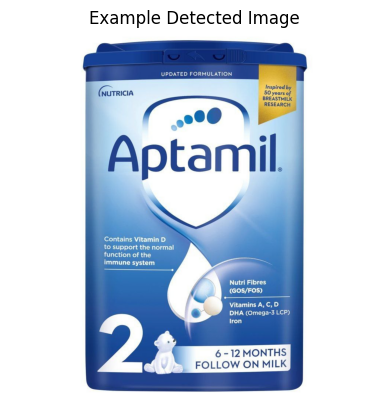

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Display an example image with detections
example_image = input_path + os.listdir(input_path)[0]
image = Image.open(example_image)
plt.imshow(image)
plt.title("Example Detected Image")
plt.axis("off")
plt.show()

In [1]:
import sys
import os
import pandas as pd

# Append the project root path to sys.path
sys.path.append(os.path.abspath(".."))

In [2]:
from scripts.database_setup import DatabaseManager

In [4]:
# Load the detection results from CSV
detection_results_path = "../data/preprocessed/detection_results/detection_results.csv"
detection_results_df = pd.read_csv(detection_results_path)

# Display the first few rows
detection_results_df.head()

,image_name,class_id,x_center,y_center,width,height,confidence
0,@lobelia4cosmetics_15168,0,0.467553,0.517969,0.259578,0.376563,0.892511
1,@EAHCI_2593,0,0.209945,0.374219,0.117127,0.110937,0.700203
2,@EAHCI_2593,67,0.466298,0.468359,0.287293,0.277344,0.711582
3,@EAHCI_2593,0,0.211602,0.520703,0.113812,0.111719,0.763368
4,@DoctorsET_814,41,0.708984,0.737500,0.080469,0.175000,0.656813


In [7]:
db_manager = DatabaseManager()
db_manager.connect_to_database()
db_manager.create_detected_objects_table()
db_manager.insert_detection_results(detection_results_df)

# Log success
print("✅ Detection results successfully inserted into the database.")

✅ Detection results successfully inserted into the database.
